In [21]:
from matplotlib import pyplot as plt
import numpy as np
from iminuit import Minuit
from iminuit.cost import LeastSquares
import math

In [22]:
evt_x = np.loadtxt("data/fit-data-1.txt")

In [23]:
print('max: ', evt_x.max())
print('entries: ', len(evt_x))

max:  97.05734290236616
entries:  440


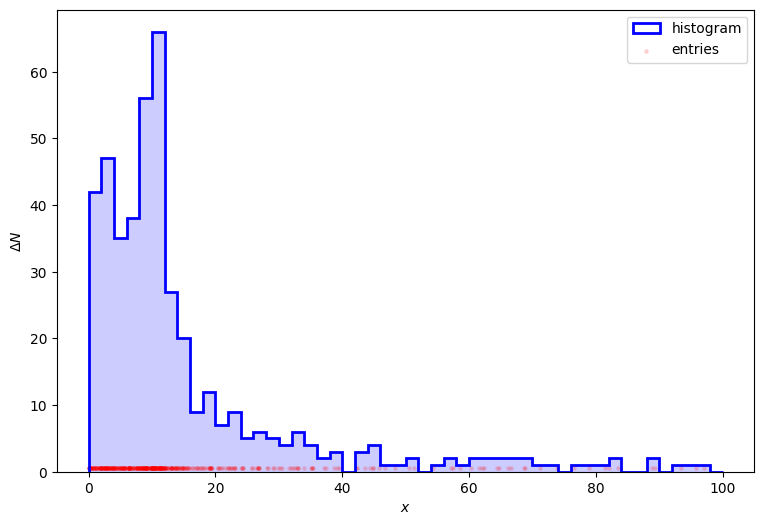

In [24]:
fig, ax = plt.subplots(figsize=(9, 6))
n_bins = 50
x_range = (0, 100)
data_y, bins, patches = ax.hist(evt_x, n_bins, range=x_range, density=False, 
    histtype=u'step', edgecolor='b', linewidth=2, label='histogram')
ax.hist(evt_x, n_bins, range=x_range, density=False, color='b', alpha=0.2)
ax.scatter(evt_x, np.full_like(evt_x, 0.5), marker='o', color='r', s=10, alpha=0.2, linewidth=0, label='entries')
plt.xlabel('$x$')
plt.ylabel(r'$\Delta N$')
plt.legend()
plt.show()

In [25]:
data_x = (bins[1:] + bins[:-1])/2
delta_x = bins[1] - bins[0]
print("𝚫x = {:.2f}".format(delta_x))

𝚫x = 2.00


In [26]:
data_yerr = np.sqrt(data_y)
#print(data_y)
#print(data_yerr)

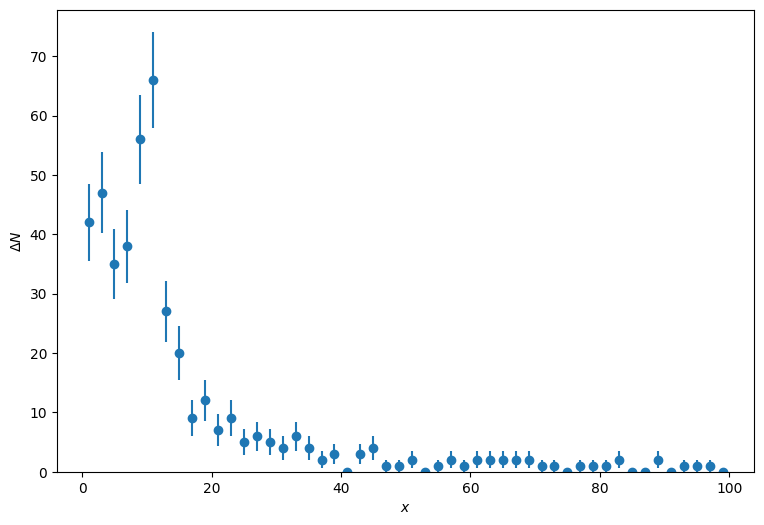

In [27]:
plt.figure(figsize=(9, 6))
plt.errorbar(data_x, data_y, data_yerr, fmt="o")
plt.xlabel('$x$')
plt.ylabel(r'$\Delta N$')
plt.ylim(0)
plt.show()

In [39]:
def bkg_pdf(x, l):
    return np.exp(-x/l)/l
def sig_pdf(x, mu, sigma):
    return np.exp(-((x - mu)/sigma)**2/2)/math.sqrt(2*math.pi*sigma**2)
def bkg_model(x, b, l):
    return b * bkg_pdf(x, l)*delta_x
def sig_model(x, s, mu, sigma):
    return s * sig_pdf(x, mu, sigma)*delta_x
def fit_model(x, b, l, s, mu, sigma):
    return bkg_model(x, b, l) + sig_model(x, s, mu, sigma)

In [40]:
least_squares_mode = LeastSquares(data_x[data_y>0], data_y[data_y>0], data_yerr[data_y>0], fit_model)
m = Minuit(least_squares_mode, *(500,5,100,10,2), name=("B", "$\lambda$", "S", "$\mu$", "$\sigma$"))

In [41]:
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 29.4 (χ²/ndof = 0.8)       │              Nfcn = 208              │
│ EDM = 1.96e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ B    │    319    │    23     │            │            │         │         │       │
│ 1 │ 𝜆    │   13.7    │    1.1    │            │            │         │         │       │
│ 2 │ S    │    96     │    17     │            │            │         │         │       │
│ 3 │ 𝜇    │   10.23   │   0.30    │            │            │         │         │       │
│ 4 │ 𝜎    │   1.65    │   0.35    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────────────────────┐
│   │       B       𝜆       S       𝜇       𝜎 │
├───┼─────────────────────────────────────────┤
│ B │     512    -3.1 -0.19e3    1.40   -3.31 │
│ 𝜆 │    -3.1    1.25     4.1   -0.06    0.08 │
│ S │ -0.19e3     4.1     285   -1.43    3.33 │
│ 𝜇 │    1.40   -0.06   -1.43   0.093   -0.05 │
│ 𝜎 │   -3.31    0.08    3.33   -0.05   0.124 │
└───┴─────────────────────────────────────────┘

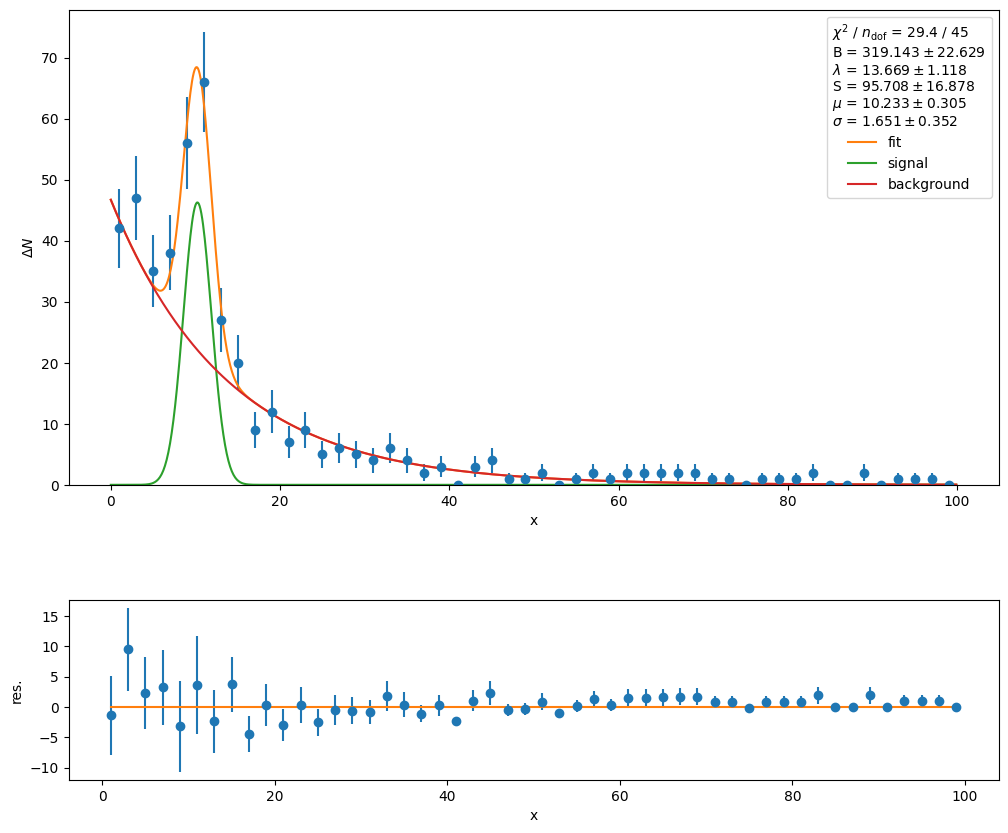

In [43]:
import matplotlib.gridspec as gridspec
data_x_f = np.arange(0, bins[-1], 0.1)
data_y_f = fit_model(data_x_f, *m.values)
bkg_y_f = bkg_model(data_x_f, *m.values[:2])
sig_y_f = sig_model(data_x_f, *m.values[2:])

plt.figure(figsize=(12,10),dpi=100)
gs = gridspec.GridSpec(8, 1)
ax0 = plt.subplot(gs[:5, :])
ax1 = plt.subplot(gs[6:, :])
ax0.errorbar(data_x, data_y, data_yerr, fmt="o")
ax0.plot(data_x_f, data_y_f, label="fit")
ax0.plot(data_x_f, sig_y_f, label="signal")
ax0.plot(data_x_f, bkg_y_f, label="background")
ax0.set_xlabel('x')
ax0.set_ylabel('$\Delta N$')
ax1.errorbar(data_x, (data_y - fit_model(data_x, *m.values)), data_yerr, fmt="o")
ax1.plot([data_x[0],data_x[-1]], [0,0])
ax1.set_xlabel('x')
ax1.set_ylabel('res.')
ax0.set_ylim(0)
ax.legend()

fit_info = [ f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m.fval:.1f} / {len(data_x) - m.nfit}" ]
for p, v, e in zip(m.parameters, m.values, m.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
ax0.legend(title="\n".join(fit_info))
plt.show()

## Unbinned (meno conveniente)

In [44]:
def neg_log_like_fun(b, l, s, mu, sigma):
    return s + b - np.array([math.log(fit_model(x, b, l, s, mu, sigma)) for x in evt_x]).sum()
neg_log_like_fun.errordef = Minuit.LIKELIHOOD 
g = Minuit(neg_log_like_fun, 500, 13, 190, 10, 1.6, name=("B", "$\lambda$", "S", "$\mu$", "$\sigma$"))
g.limits['B'] = (0, 10000)
g.limits['S'] = (0, 10000)

In [45]:
g.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -938.2                     │              Nfcn = 114              │
│ EDM = 4.56e-05 (Goal: 0.0001)    │            time = 0.3 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ B    │    345    │    25     │            │            │    0    │  10000  │       │
│ 1 │ 𝜆    │   16.6    │    1.0    │            │            │         │         │       │
│ 2 │ S    │    95     │    20     │            │            │    0    │  10000  │       │
│ 3 │ 𝜇    │   10.09   │   0.32    │            │            │         │         │       │
│ 4 │ 𝜎    │    1.7    │    0.5    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬────────────────────────────────────┐
│   │      B      𝜆      S      𝜇      𝜎 │
├───┼────────────────────────────────────┤
│ B │    639   -6.2 -0.3e3   2.12  -6.36 │
│ 𝜆 │   -6.2  0.938    6.2  -0.06   0.14 │
│ S │ -0.3e3    6.2    391  -2.12   6.37 │
│ 𝜇 │   2.12  -0.06  -2.12  0.105  -0.06 │
│ 𝜎 │  -6.36   0.14   6.37  -0.06  0.213 │
└───┴────────────────────────────────────┘

**Nota**: di seguito è molto importante non dimenticare di moltiplicare la PDF per $\Delta x$!

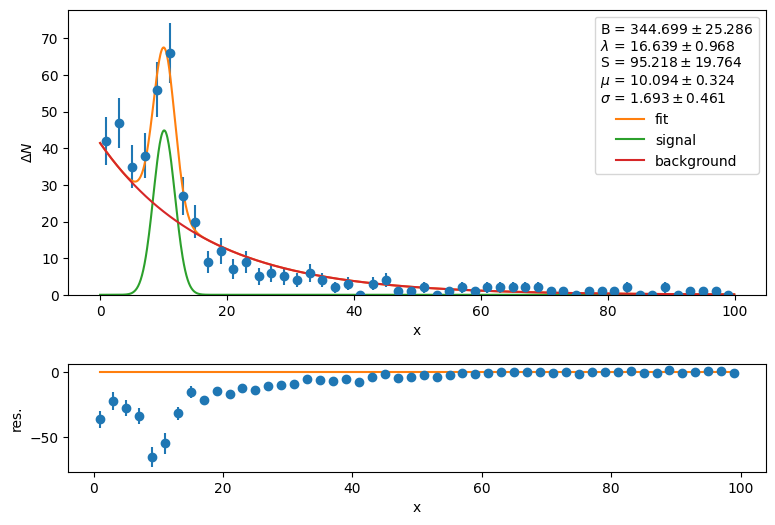

In [46]:
data_x_f = np.arange(0, bins[-1], 0.1)
data_y_f = fit_model(data_x_f, *g.values)
bkg_y_f = bkg_model(data_x_f, *g.values[:2])
sig_y_f = sig_model(data_x_f, *g.values[2:])

plt.figure(figsize=(9,6),dpi=100)
gs = gridspec.GridSpec(8, 1)
ax0 = plt.subplot(gs[:5, :])
ax1 = plt.subplot(gs[6:, :])
ax0.errorbar(data_x, data_y, data_yerr, fmt="o")
ax0.plot(data_x_f, data_y_f, label="fit")
ax0.plot(data_x_f, sig_y_f, label="signal")
ax0.plot(data_x_f, bkg_y_f, label="background")
ax0.set_xlabel('x')
ax0.set_ylabel('$\Delta N$')
ax1.errorbar(data_x, data_y - fit_model(data_x, *g.values)*delta_x, data_yerr, fmt="o")
ax1.plot([data_x[0], data_x[-1]], [0, 0])
ax1.set_xlabel('x')
ax1.set_ylabel('res.')
ax0.set_ylim(0)
fit_info = []
for p, v, e in zip(g.parameters, g.values, g.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
ax0.legend(title="\n".join(fit_info))
plt.show()

Aggiungiamo al modello del fondo una costante $c$ che rappresenta l'eccesso di conteggi sulla coda a destra. Un modello più accurato potrebbe essere una polinomiale, anche di grado basso.

In [48]:
def bkg_pdf(x, l):
    return np.exp(-x/l)/l
def sig_pdf(x, mu, sigma):
    return np.exp(-((x - mu)/sigma)**2/2)/math.sqrt(2*math.pi*sigma**2)
def bkg_model(x, b, l, c):
    return b*bkg_pdf(x, l)*delta_x + c
def sig_model(x, s, mu, sigma):
    return s*sig_pdf(x, mu, sigma)*delta_x
def fit_model(x, b, l, c, s, mu, sigma):
    return bkg_model(x, b, l, c) + sig_model(x, s, mu, sigma)
least_squares_mode = LeastSquares(data_x[data_y>0], data_y[data_y>0], data_yerr[data_y>0], fit_model)
m = Minuit(least_squares_mode, 500, 5, 0, 100, 10, 2, name=("B", "$\lambda$", "c", "S", "$\mu$", "$\sigma$"))
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 13.07 (χ²/ndof = 0.4)      │              Nfcn = 217              │
│ EDM = 0.000145 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ B    │    281    │    24     │            │            │         │         │       │
│ 1 │ 𝜆    │   10.9    │    1.0    │            │            │         │         │       │
│ 2 │ c    │   1.15    │   0.27    │            │            │         │         │       │
│ 3 │ S    │    99     │    17     │            │            │         │         │       │
│ 4 │ 𝜇    │   10.27   │   0.29    │            │            │         │         │       │
│ 5 │ 𝜎    │   1.69    │   0.35    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────────────────────────────┐
│   │       B       𝜆       c       S       𝜇       𝜎 │
├───┼─────────────────────────────────────────────────┤
│ B │     597     7.0   -2.46 -0.20e3    1.13   -3.45 │
│ 𝜆 │     7.0    0.96   -0.13    -0.9   -0.03   -0.01 │
│ c │   -2.46   -0.13  0.0726    0.41    0.00    0.01 │
│ S │ -0.20e3    -0.9    0.41     282   -1.16    3.15 │
│ 𝜇 │    1.13   -0.03    0.00   -1.16  0.0858   -0.04 │
│ 𝜎 │   -3.45   -0.01    0.01    3.15   -0.04    0.12 │
└───┴─────────────────────────────────────────────────┘

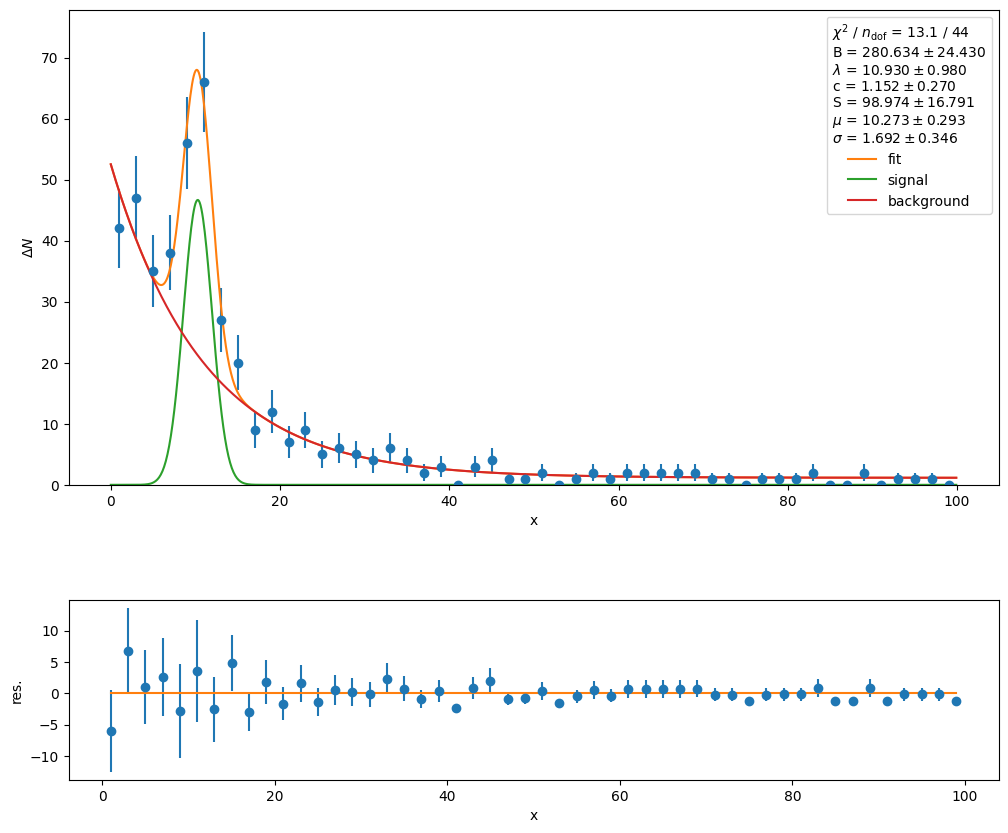

In [49]:
import matplotlib.gridspec as gridspec
data_x_f = np.arange(0, bins[-1], 0.1)
data_y_f = fit_model(data_x_f, *m.values)
bkg_y_f = bkg_model(data_x_f, *m.values[:3])
sig_y_f = sig_model(data_x_f, *m.values[3:])

plt.figure(figsize=(12,10),dpi=100)
gs = gridspec.GridSpec(8, 1)
ax0 = plt.subplot(gs[:5, :])
ax1 = plt.subplot(gs[6:, :])
ax0.errorbar(data_x, data_y, data_yerr, fmt="o")
ax0.plot(data_x_f, data_y_f, label="fit")
ax0.plot(data_x_f, sig_y_f, label="signal")
ax0.plot(data_x_f, bkg_y_f, label="background")
ax0.set_xlabel('x')
ax0.set_ylabel('$\Delta N$')
ax1.errorbar(data_x, (data_y-fit_model(data_x, *m.values)), data_yerr, fmt="o")
ax1.plot([data_x[0],data_x[-1]], [0,0])
ax1.set_xlabel('x')
ax1.set_ylabel('res.')
ax0.set_ylim(0)
ax.legend()

fit_info = [ f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m.fval:.1f} / {len(data_x) - m.nfit}" ]
for p, v, e in zip(m.parameters, m.values, m.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
ax0.legend(title="\n".join(fit_info))
plt.show()